#### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

#### Data Collection and Analysis

In [2]:
# Loading the dataset from csv file to a Pandas DataFrame
big_mart_data = pd.read_csv("../Datasets/big_mart_data.csv")

In [3]:
# first 5 rows of the data
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# number of data points and features in the data
big_mart_data.shape

(8523, 12)

In [5]:
# getting some info about data
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features
- Item_Identifier
- Item_Fat_Content           
- Item_Type                  
- Outlet_Identifier          
- Outlet_Size                 
- Outlet_Location_Type       
- Outlet_Type                

In [6]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Handling missing values

In [7]:
# filling the missing value in "Item_Weight" column with their mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [8]:
# replacing the missing values in "Outlet_Size" with mode
mode_of_outlet_size = big_mart_data.pivot_table(
    values="Outlet_Size", 
    columns="Outlet_Type", 
    aggfunc=(lambda x : x.mode()[0])
)

In [9]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [10]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [11]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [12]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x : mode_of_outlet_size[x])

In [13]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Data Visualization

In [15]:
sns.set()

C:\Users\idhar\AppData\Local\Temp\ipykernel_16540\661482845.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


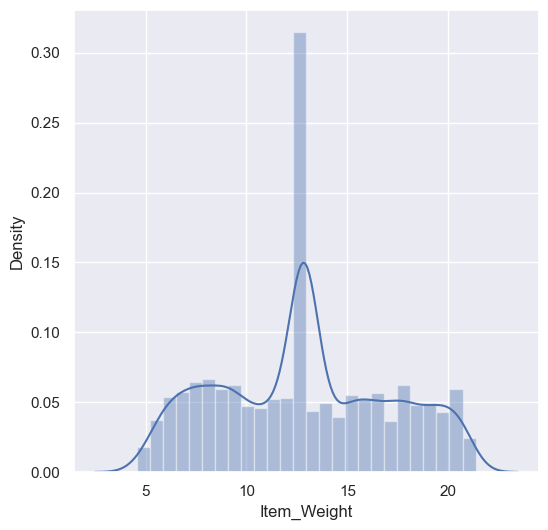

In [16]:
# Item_Weight Distribution
plt.figure(figsize=(6, 6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\idhar\AppData\Local\Temp\ipykernel_16540\3970683237.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


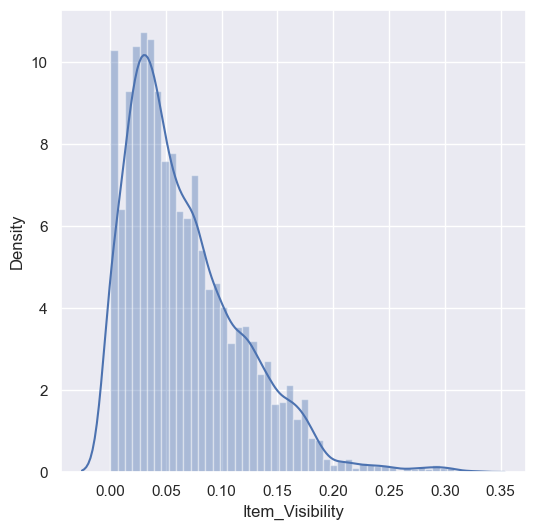

In [17]:
# Item_Visibility Distribution
plt.figure(figsize=(6, 6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\idhar\AppData\Local\Temp\ipykernel_16540\2035415431.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


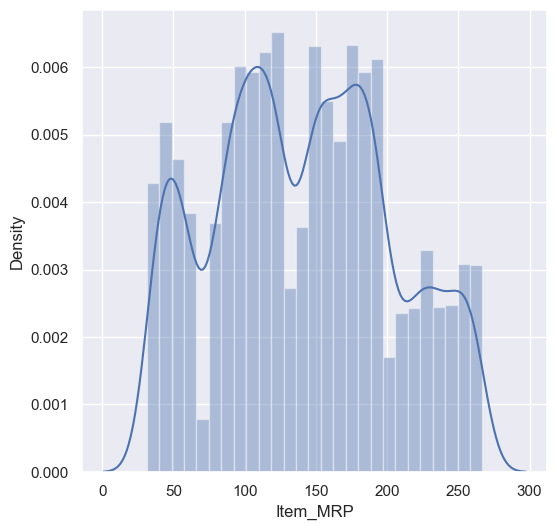

In [18]:
# Item_MRP Distribution
plt.figure(figsize=(6, 6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\idhar\AppData\Local\Temp\ipykernel_16540\5431845.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


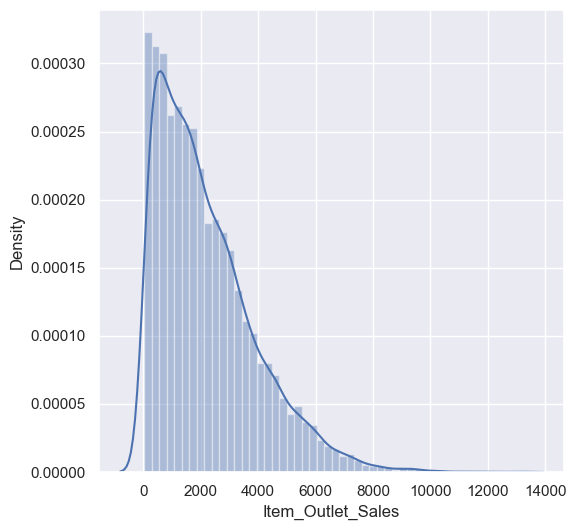

In [19]:
# Item_Outlet_Sales Distribution
plt.figure(figsize=(6, 6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

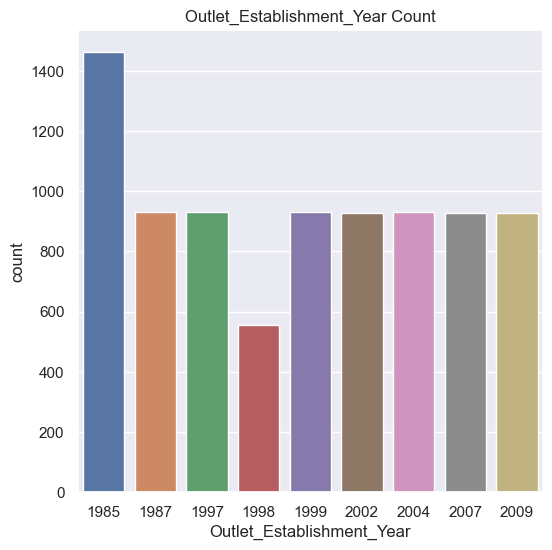

In [20]:
# Outlet_Establishment_Year Count
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.title("Outlet_Establishment_Year Count")
plt.show()

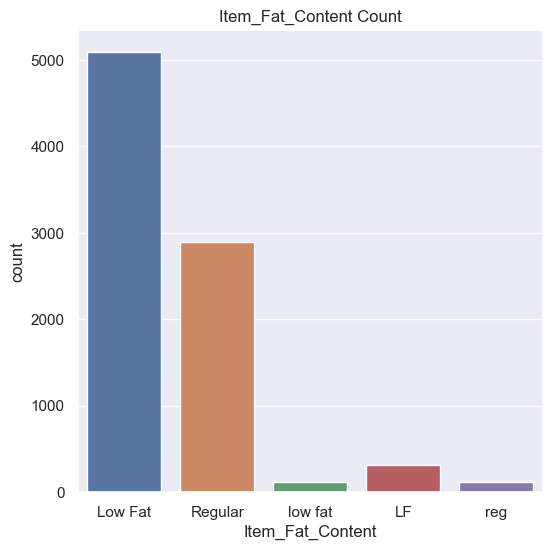

In [21]:
# Item_Fat_Content Count
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.title("Item_Fat_Content Count")
plt.show()

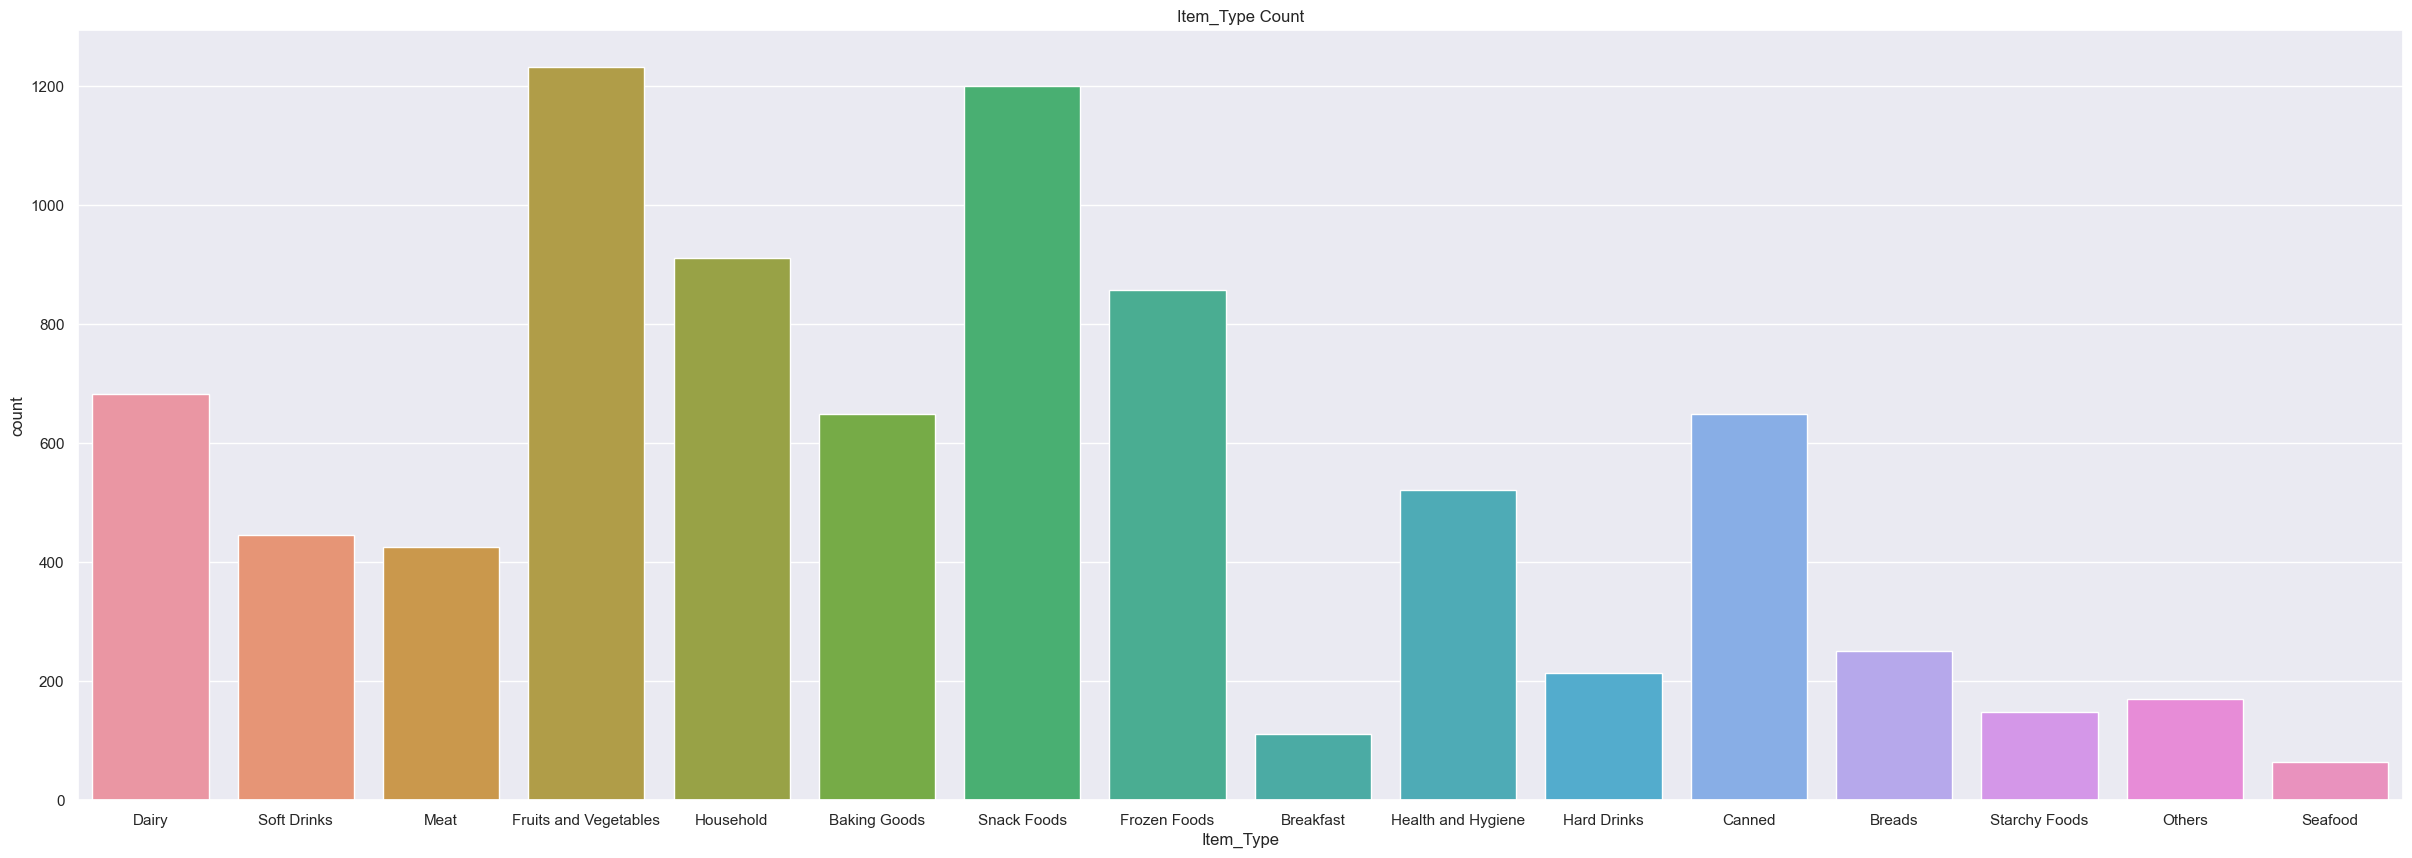

In [22]:
# Item_Type Count
plt.figure(figsize=(30, 10))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.title("Item_Type Count")
plt.show()

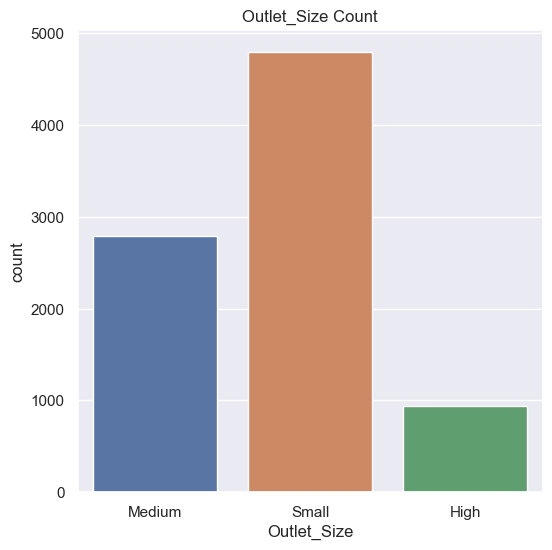

In [23]:
# Outlet_Size Count
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.title("Outlet_Size Count")
plt.show()

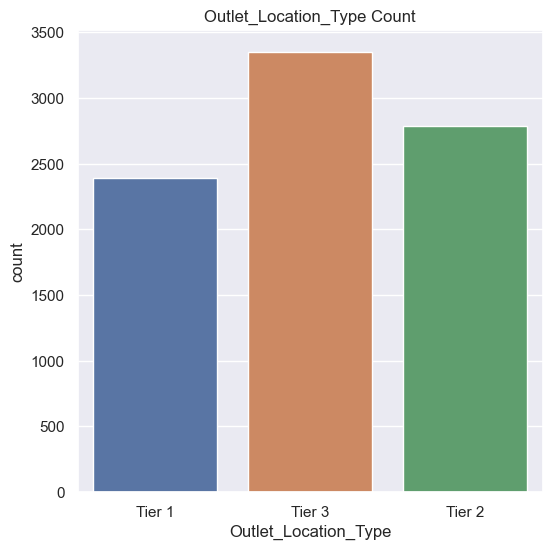

In [24]:
# Outlet_Location_Type Count
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Location_Type', data=big_mart_data)
plt.title("Outlet_Location_Type Count")
plt.show()

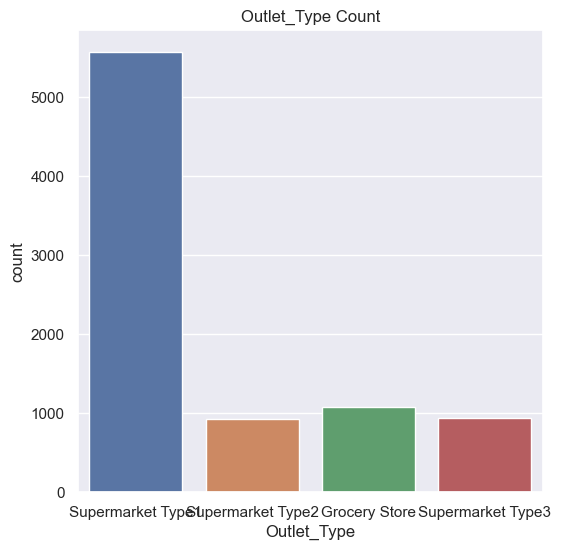

In [25]:
# Outlet_Type Count
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Type', data=big_mart_data)
plt.title("Outlet_Type Count")
plt.show()

#### Data Preprocessing

In [26]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
big_mart_data.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##### Label Encoding

In [30]:
encoder = LabelEncoder()

In [31]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [32]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [33]:
# separating data and target
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

#### Train Test Split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (7670, 11) (853, 11)


#### Model Training
- Gradient Boosting Regressor

In [36]:
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [37]:
regressor.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

#### Model Evaluation

In [38]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [39]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Value of training data :", r2_train)

R Squared Value of training data : 0.6347711936561053


In [40]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [41]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Value of test data :", r2_test)

R Squared Value of test data : 0.5804979686537328
